## Importing Libraries

In [ ]:
!pip install xgboost==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 6.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, StackingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

## Importing Data

In [ ]:
# Read the test and train data as Pandas DataFrames, setting the "Id" column as the index.
test=pd.read_csv('test.csv',index_col='Id')
train=pd.read_csv('train.csv',index_col='Id')

In [ ]:
# Create two lists: numerical and categorical.
# numerical contains the names of the columns in the train DataFrame that have numerical data types.
# categorical contains the names of the columns in the train DataFrame that have categorical data types.
numerical=list(train.describe().columns)
categorical= list(set(train.columns)-set(numerical))

In [ ]:
train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Data Visualization 

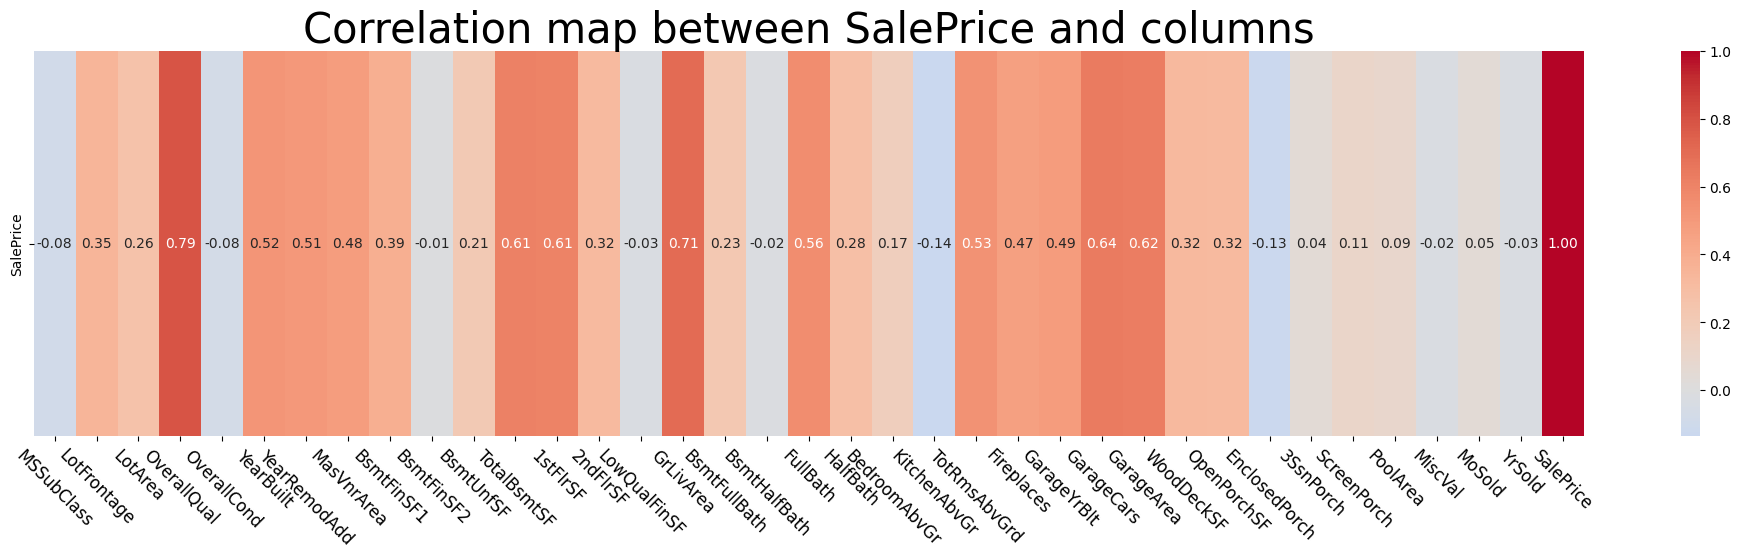

In [ ]:
plt.figure(figsize=(25,5))
sns.heatmap(pd.DataFrame(train.corr()['SalePrice']).T,cmap='coolwarm', annot=True,fmt='.2f',center=0)
plt.xticks(rotation=-45,fontsize=12)
plt.title("Correlation map between SalePrice and columns",fontsize=30)
plt.show()

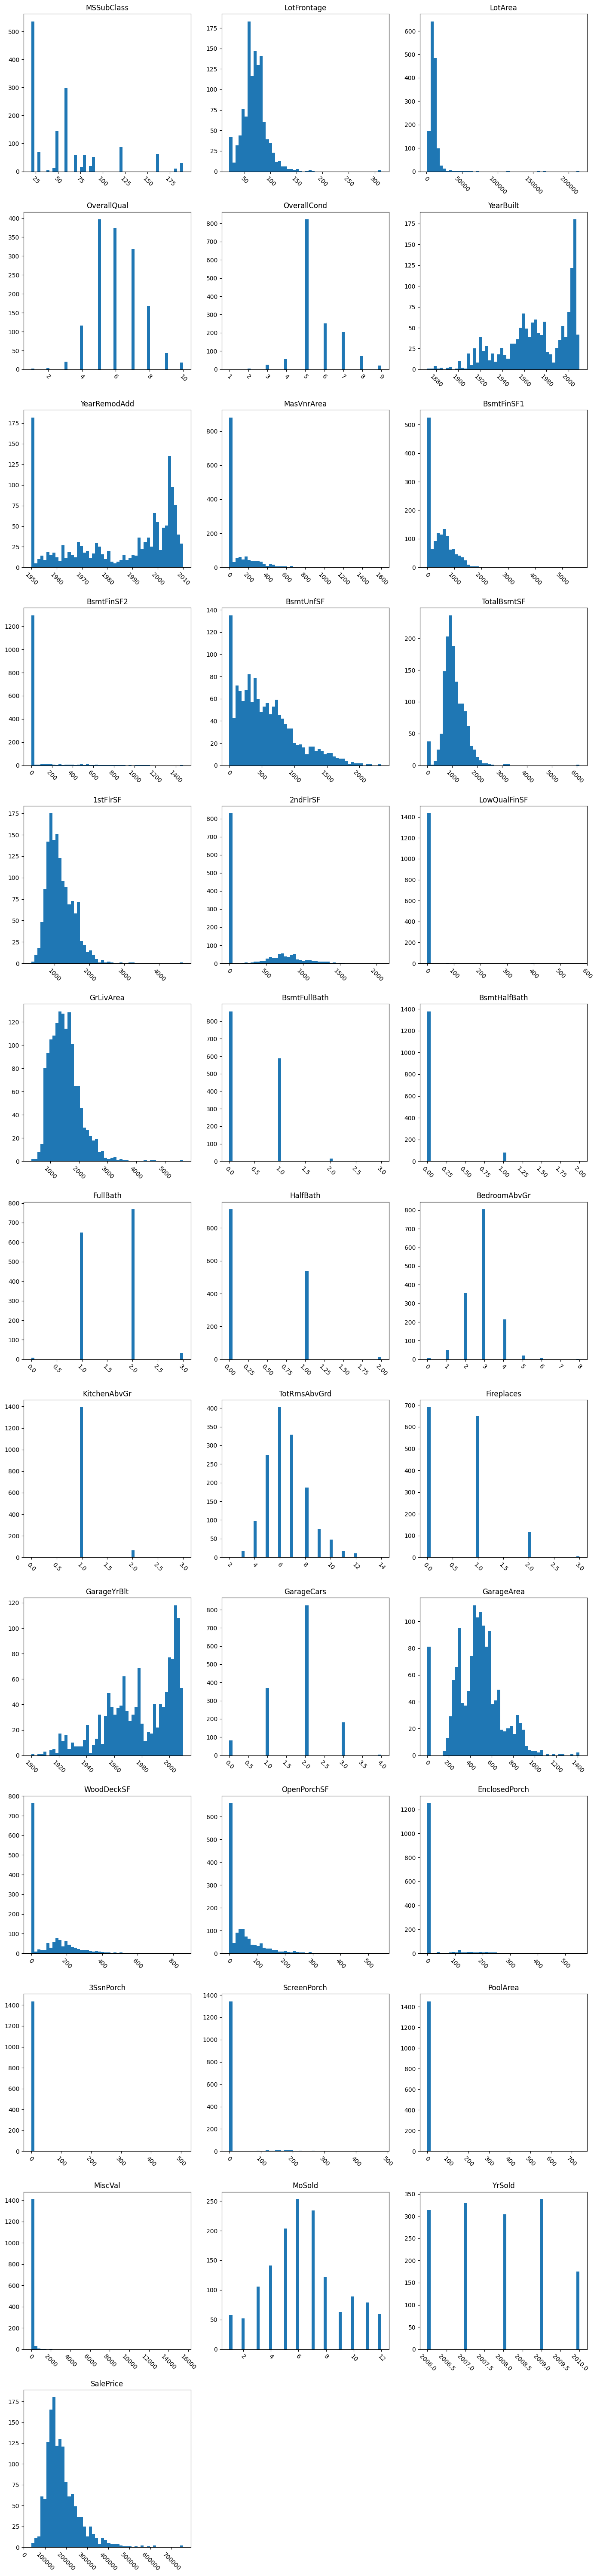

In [ ]:
# Drawing histogram for each column to determine the distribution 

# Create a figure and a set of subplots.
fig, ax = plt.subplots(13, 3, figsize=(14, 60))

# Iterate over the numerical columns.
for i in range(len(numerical)):

    # Get the row and column indices for the subplot.
    row = i // 3
    col = i % 3

    # Create a histogram of the values in the current column.
    ax[row, col].hist(train[numerical[i]], bins=50)

    # Set the title of the subplot to the name of the column.
    ax[row, col].set_title(numerical[i])

    # Rotate the x-axis labels by 45 degrees to make them more readable.
    ax[row, col].tick_params(axis='x', rotation=-45)

# Remove the empty subplots at the bottom right corner.
for i in range(2):
    ax[-1, -1-i].remove()

# Tighten the layout to improve the appearance of the figure.
fig.tight_layout()

# Show the figure.
plt.show()

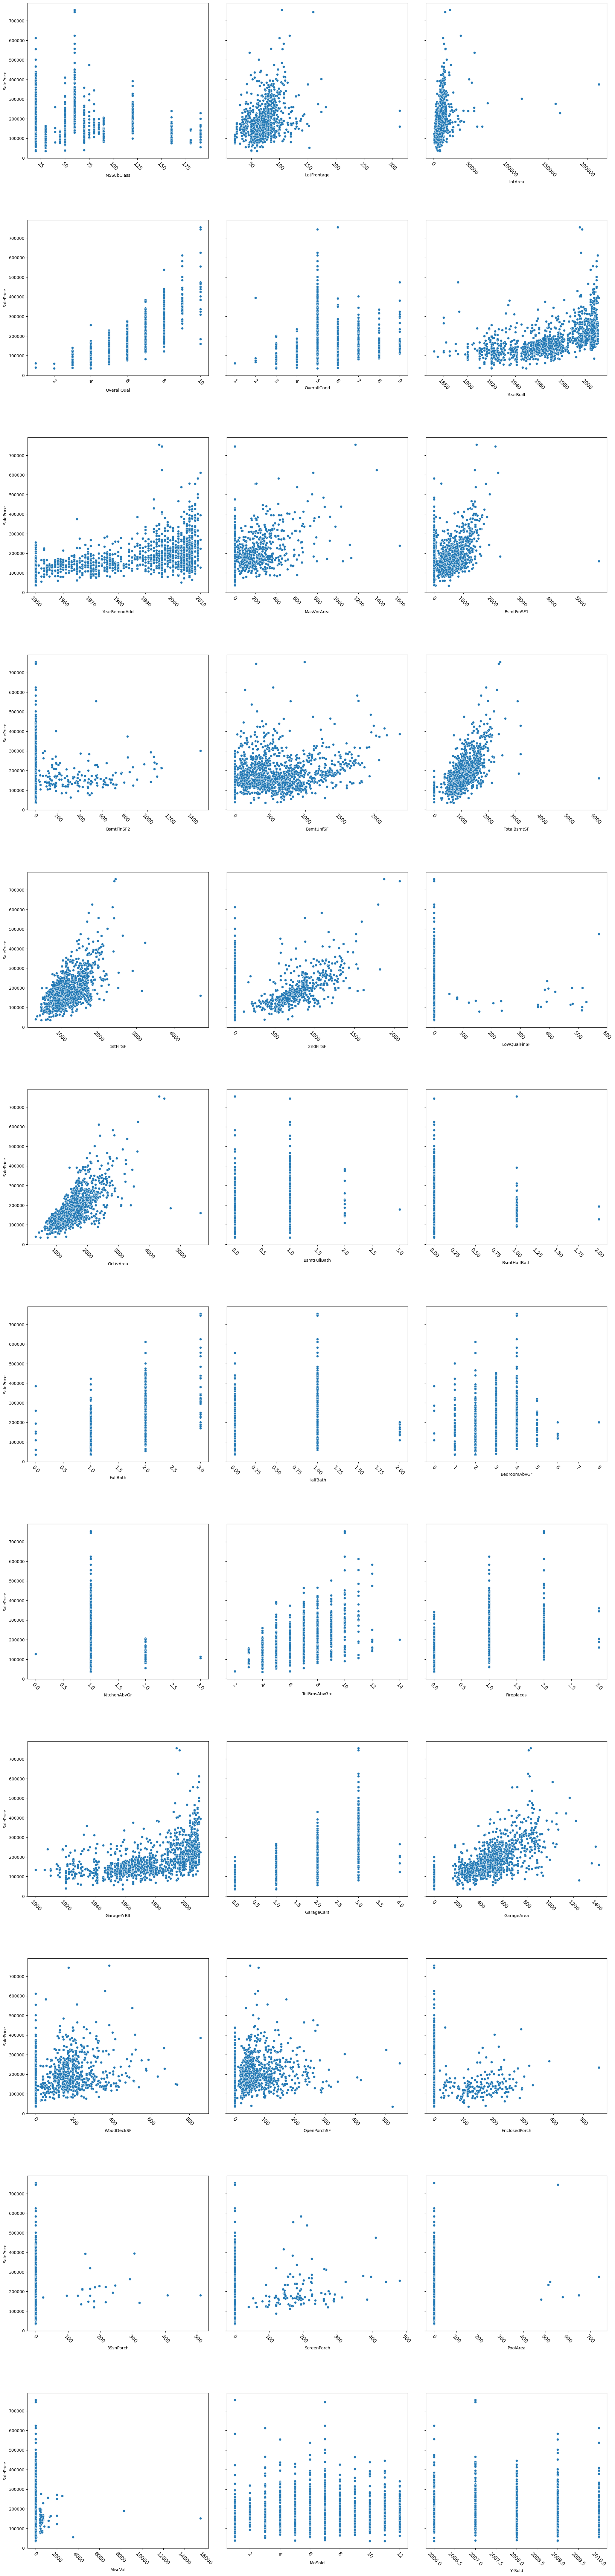

In [ ]:
# Drawing scatterplots for each column against target (SalePrice) column

# Create a figure and a set of subplots, sharing the y-axis.
fig, ax = plt.subplots(13, 3, figsize=(25, 120), sharey=True)

# Iterate over the numerical columns.
for i in range(len(numerical)):

    # Get the row and column indices for the subplot.
    row = i // 3
    col = i % 3

    # Create a scatter plot of the target variable (SalePrice) vs. the current column.
    g = sns.scatterplot(y=train['SalePrice'], x=train[numerical[i]], ax=ax[row, col])

    # If this is not the first column, remove the y-label.
    if col != 0:
        g.set(ylabel=None)

    # Rotate the x-axis labels by 45 degrees and set the label size to large.
    ax[row, col].tick_params(axis='x', rotation=-45, labelsize='large')

# Adjust the subplot spacing.
fig.subplots_adjust(hspace=0.4, wspace=0.1)

# Remove the empty subplots at the bottom right corner.
for i in range(3):
    ax[-1, -1-i].remove()

plt.show()

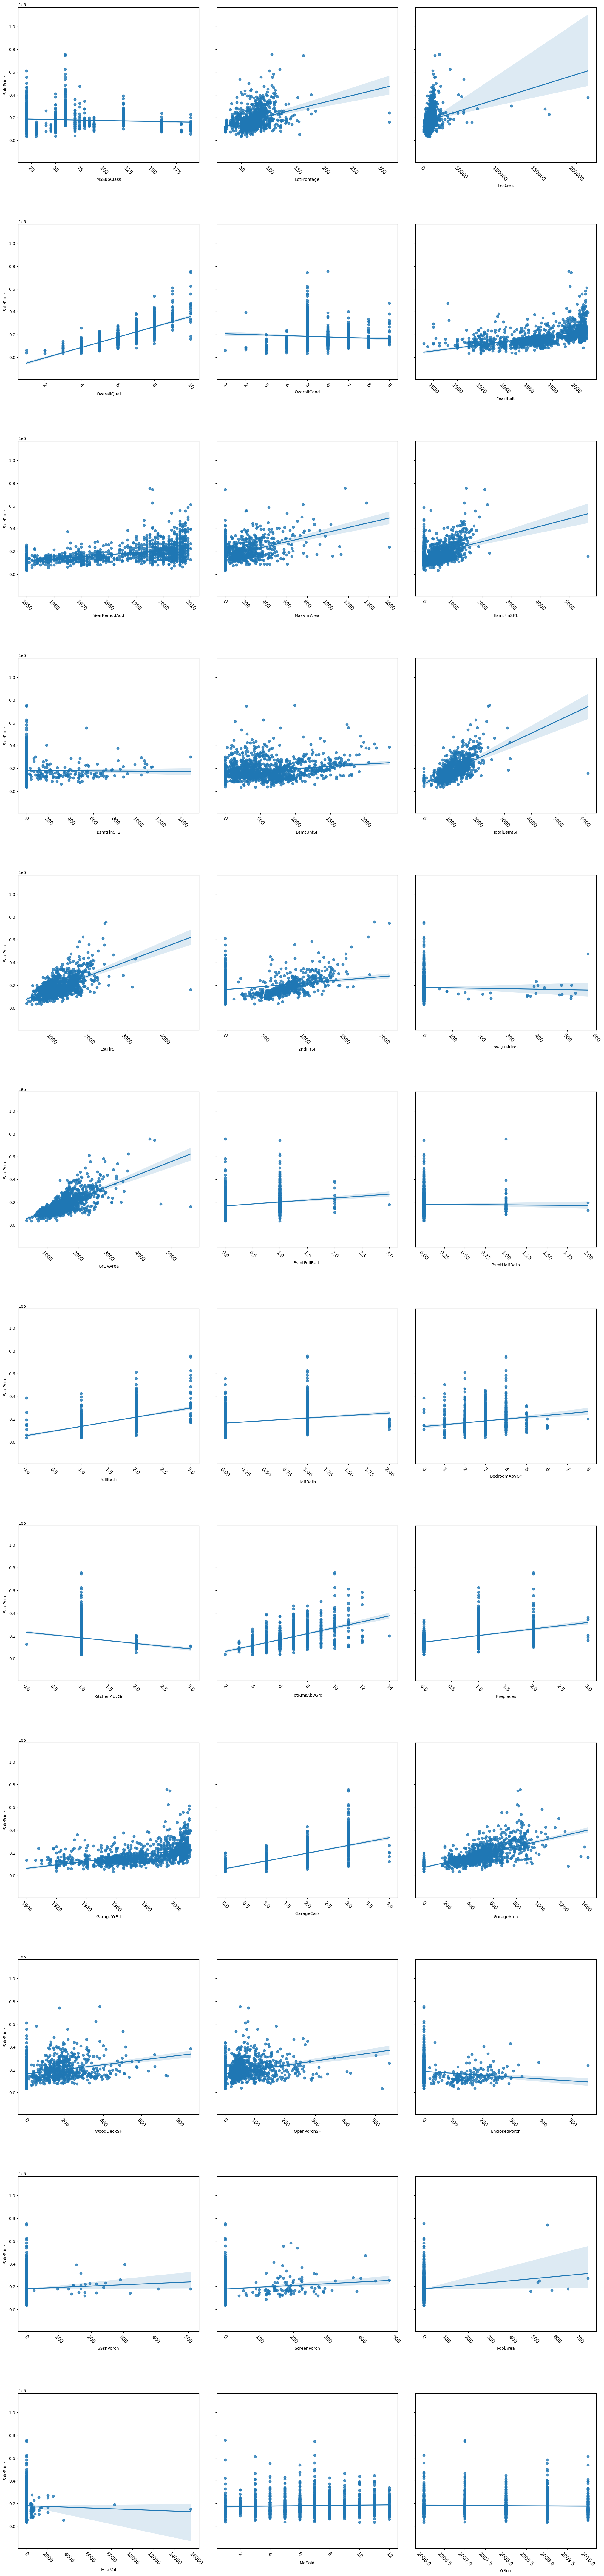

In [ ]:
# Drawing regression plots for each column against target (SalePrice) column to define the relation

# Create a figure and a set of subplots, sharing the y-axis.
fig, ax = plt.subplots(13, 3, figsize=(25, 120), sharey=True)

# Iterate over the numerical columns.
for i in range(len(numerical)):

    # Get the row and column indices for the subplot.
    row = i // 3
    col = i % 3

    # Create a regression plot of the target variable (SalePrice) vs. the current column.
    g = sns.regplot(y=train['SalePrice'], x=train[numerical[i]], ax=ax[row, col])

    # If this is not the first column, remove the y-label.
    if col != 0:
        g.set(ylabel=None)

    # Rotate the x-axis labels by 45 degrees and set the label size to large.
    ax[row, col].tick_params(axis='x', rotation=-45, labelsize='large')

fig.subplots_adjust(hspace=0.4, wspace=0.1)

for i in range(3):
    ax[-1, -1-i].remove()
plt.show()


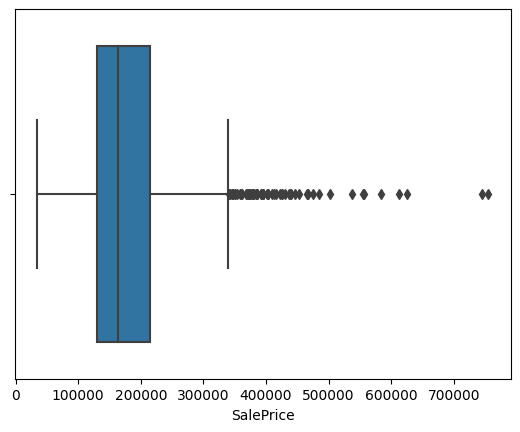

In [ ]:
# Showing the disribution of target (SalePrice) column
sns.boxplot(x=train['SalePrice'])
plt.show()

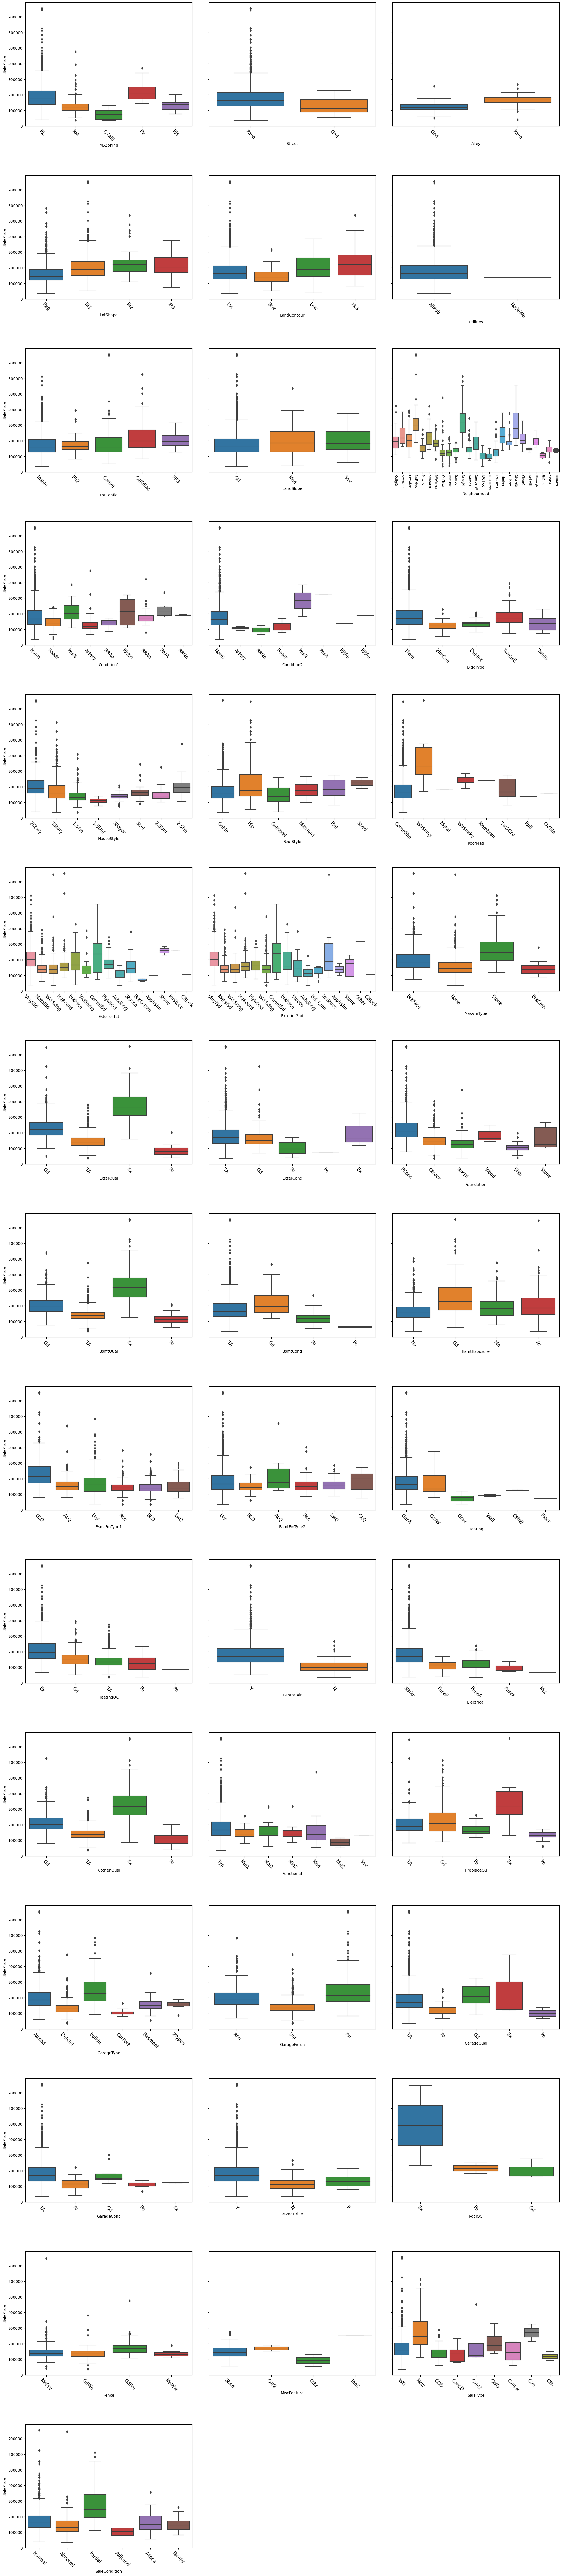

In [ ]:
# Drawing for each value in categorical columns a boxplot agianst the target (SalePrice) column

# Create a figure and a set of subplots, sharing the y-axis.
fig, ax = plt.subplots(15, 3, figsize=(25, 120), sharey=True)

# Iterate over the categorical columns.
for i in range(len(categorical)):

    # Get the row and column indices for the subplot.
    row = i // 3
    col = i % 3

    # Create a box plot of the target variable (SalePrice) vs. the current column.
    g = sns.boxplot(y=train['SalePrice'], x=train[categorical[i]], ax=ax[row, col])

    # If this is not the first column, remove the y-label.
    if col != 0:
        g.set(ylabel=None)

    # If the current column is the eighth () column, rotate the x-axis labels by -90 degrees and set the label size to small.
    if i == 8:
        ax[row, col].tick_params(axis='x', rotation=-90, labelsize='small')
    # Otherwise, rotate the x-axis labels by -45 degrees and set the label size to large.
    else:
        ax[row, col].tick_params(axis='x', rotation=-45, labelsize='large')

fig.subplots_adjust(hspace=0.4, wspace=0.1)

for i in range(2):
    ax[-1, -1-i].remove()
plt.show()


## Data Preprocessing

In [ ]:
# List of columns that needed to be converted to categorical columns
cat=["MSSubClass"]

# List of columns that have null values that needed to be dealed with
NA=['Alley','MiscFeature','MasVnrType',]

# List of ordinal categorical columns
ordinal=['LotShape', 'Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
         'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish',
         'GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

binary=['CentralAir',]


### Feature Engineering

In [ ]:
total =  train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
roomstrain = train['TotRmsAbvGrd'] + train['KitchenAbvGr']
roomstest = test['TotRmsAbvGrd'] + test['KitchenAbvGr']

# Calculate the age of the house
print(f"HouseAge :{ train['SalePrice'].corr(train['YrSold'] - train['YearBuilt'])}")

# Calculate the age since last remodel
print(f"RemodAge :{train['SalePrice'].corr(train['YrSold'] - train['YearRemodAdd'])}")

# Calculate the total area of the house
print(f"TotalArea :{train['SalePrice'].corr(train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'])}")

# Calculate the total number of bathrooms
print(f"TotalBath :{train['SalePrice'].corr(train['FullBath'] + (0.5 * train['HalfBath']))}")

# Create a new feature that represents the overall quality and condition
print(f"OverallGrade :{train['SalePrice'].corr(train['OverallQual'] * train['OverallCond'])}")

# Calculate the total number of rooms
print(f"TotalRooms :{train['SalePrice'].corr(train['TotRmsAbvGrd'] + train['KitchenAbvGr'])}")

# Create a new feature that represents the total number of garage cars and total garage area
print(f"TotalGarage :{train['SalePrice'].corr(train['GarageCars'] + train['GarageArea'])}")

# Calculate the total of Porch Area
print(f"TotalPorch :{train['SalePrice'].corr(train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch'])}")

# Calculate the average room size
print(f"AvgRoomSize :{train['SalePrice'].corr(total / roomstrain)}")

HouseAge :-0.523350417546816
RemodAge :-0.5090787380156292
TotalArea :0.7822600527979845
TotalBath :0.5979656210064282
OverallGrade :0.5652938448019195
TotalRooms :0.49406734068073355
TotalGarage :0.6237450702118135
TotalPorch :0.19573894078383544
AvgRoomSize :0.5688214634701321
PricePerSqft :0.640602467297282


In [ ]:
# Calculate the age of the house
train['HouseAge']     =  train['YrSold'] - train['YearBuilt']
test['HouseAge']      =  test['YrSold'] - test['YearBuilt']

# Calculate the age since last remodel
train['RemodAge']     =  train['YrSold'] - train['YearRemodAdd']
test['RemodAge']      =  test['YrSold'] - test['YearRemodAdd']

# Calculate the total area of the house
train['TotalArea']    =  train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalArea']     =  test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

# Calculate the total number of bathrooms
train['TotalBath']    =  train['FullBath'] + (0.5 * train['HalfBath'])
test['TotalBath']     =  test['FullBath'] + (0.5 * test['HalfBath'])

# Create a new feature that represents the overall quality and condition
train['OverallGrade'] =  train['OverallQual'] * train['OverallCond']
test['OverallGrade']  =  test['OverallQual'] * test['OverallCond']

# Create a new feature that represents the total number of garage cars and total garage area
train['TotalGarage']  =  train['GarageCars'] + train['GarageArea']
test['TotalGarage']  =  test['GarageCars'] + test['GarageArea']

# Calculate the average room size
train['AvgRoomSize']  =  train['TotalArea'] / roomstrain
test['AvgRoomSize']  =  test['TotalArea'] / roomstest


### Data Cleaning

In [ ]:
print(f'Numerical Null columns : {set(train.columns[train.isin([np.nan]).any()]) - set(categorical)}')
print(f'Ordinal Null columns : {set(train.columns[train.isin([np.nan]).any()]) - (set(categorical) - set(ordinal))-set(numerical)}')

Numerical Null columns : {'GarageYrBlt', 'LotFrontage', 'MasVnrArea'}
Ordinal Null columns : {'BsmtExposure', 'GarageFinish', 'Fence', 'BsmtQual', 'PoolQC', 'BsmtCond', 'GarageQual', 'FireplaceQu', 'BsmtFinType1', 'BsmtFinType2', 'GarageCond'}


In [ ]:
new_columns=['HouseAge' ,'RemodAge' ,'TotalArea' ,'TotalBath' ,'OverallGrade','TotalGarage','AvgRoomSize']
train[numerical+new_columns]=train[numerical+new_columns].fillna(0)

numericaltest=list(set(numerical)-set(["SalePrice"]))
test[numericaltest+new_columns]=test[numericaltest+new_columns].fillna(0)

missing_ordinals= ['BsmtCond', 'GarageQual', 'FireplaceQu', 'GarageFinish', 'BsmtFinType2', 'Fence', 'BsmtQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'PoolQC']
train[categorical]=train[categorical].fillna("NA")
test[categorical]=test[categorical].fillna("NA")


In [ ]:
train.drop(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'YearRemodAdd',
             'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

test.drop(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'YearRemodAdd',
             'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

In [ ]:
print(f"Number of duplicated rows : {sum(train.duplicated())}")

Number of duplicated rows : 0


### Dealing with Categorical Data

In [ ]:
OneHotEncoders=list(set(categorical)-set(ordinal))

In [ ]:
for column in OneHotEncoders:
    # Converting type of columns to category
    train[column] = train[column].astype('category')
    # Assigning numerical values and storing it in another columns
    train[column] = train[column].cat.codes

    # Converting type of columns to category
    test[column] = test[column].astype('category')
    # Assigning numerical values and storing it in another columns
    test[column] = test[column].cat.codes   

train['MSSubClass'] = train['MSSubClass'].astype('category')
test['MSSubClass'] = test['MSSubClass'].astype('category')


# Create an instance of One-hot-encoder
OneHot = OneHotEncoder(sparse=False)
OneHot.handle_unknown = "ignore"  
# Passing encoded columns
enc_data = pd.DataFrame(OneHot.fit_transform(train[OneHotEncoders]),columns=OneHot.get_feature_names_out(),
                        index=range(1,1461))

enc_test = pd.DataFrame(OneHot.transform(test[OneHotEncoders]),columns=OneHot.get_feature_names_out(),
                        index=range(1461,2920))

# Merge with main
y_train = train['SalePrice']
x_train = train.join(enc_data)
x_train.drop(OneHotEncoders+['CentralAir_1', 'Street_1', 'SalePrice'], inplace=True, axis=1)

x_test=test.join(enc_test)
x_test.drop(OneHotEncoders+['CentralAir_1', 'Street_1'], inplace=True, axis=1)


In [ ]:
for column in ordinal:
    # Converting type of columns to category
    x_train[column] = x_train[column].astype('category')

# Create an instance of OrdinalEncoder
OrdinalEnc = OrdinalEncoder(categories='auto')
# Passing encoded columns
ord_data = pd.DataFrame(OrdinalEnc.fit_transform(x_train[ordinal]),columns=OrdinalEnc.get_feature_names_out(),
                        index=range(1,1461))

ord_test = pd.DataFrame(OrdinalEnc.fit_transform(x_test[ordinal]),columns=OrdinalEnc.get_feature_names_out(),
                        index=range(1461,2920))

  
# Merge with main
x_train[ordinal] = ord_data[ordinal]
x_test[ordinal] = ord_test[ordinal]

### Scaling and Transforming

In [ ]:
# List of numerical columns needed to be scaled
numerical=list(set(x_train.describe().columns[:54])-set(['LowQualFinSF', 'BsmtFinSF2', '1stFlrSF',
                                                         'YearBuilt', 'BsmtFinSF1', '2ndFlrSF',
                                                         'SalePrice', 'YearRemodAdd', 'BsmtUnfSF','MSSubClass']))

In [ ]:
# Create a standard scaler object.
std_scaler = StandardScaler()

# Fit the scaler to the training data.
temp = std_scaler.fit_transform(x_train[numerical])
# Update the traning data with the transformed values.
x_train[std_scaler.feature_names_in_] = temp

# Transform the test data using the fitted scaler.
temptest = std_scaler.transform(x_test[numerical])
# Update the test data with the transformed values.
x_test[std_scaler.feature_names_in_] = temptest


## Model Selection

### Data spliting

In [ ]:
x_train_models,x_cv_models,y_train_models,y_cv_models=train_test_split(x_train,y_train,train_size=0.8,random_state=42)

In [ ]:
print(f"x_train_models shape: {x_train_models.shape}")
print(f"x_test_models shape: {x_cv_models.shape}")
print(f"y_train_models shape: {y_train_models.shape}")
print(f"y_test_models shape: {y_cv_models.shape}")

x_train_models shape: (1168, 224)
x_test_models shape: (292, 224)
y_train_models shape: (1168,)
y_test_models shape: (292,)


### Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(x_train_models, y_train_models)
results=model.predict(x_cv_models)
rmse = np.sqrt(mean_squared_error(np.log(results),np.log(y_cv_models)))
print(f"J_test:{rmse}")

J_test:0.17708956129633832
J_train:0.11796812651620055


### Random Forest Model

In [ ]:
regr = RandomForestRegressor(random_state=0, n_estimators=70, criterion='poisson')
regr.fit(x_train_models,y_train_models)
results=regr.predict(x_cv_models)
rmse = np.sqrt(mean_squared_error(np.log(results),np.log(y_cv_models)))
rmse

0.15275172800371167

### Xgboost Regressor

In [ ]:
model=XGBRegressor(enable_categorical=True)
model.fit(x_train_models,y_train_models)
results=model.predict(x_cv_models)
rmse = np.sqrt(mean_squared_error(np.log(results),np.log(y_cv_models)))
rmse

0.1535919693629558

### Gradient Boosting

In [ ]:
param_grid = { 
    'n_estimators': [150, 200,250,300],
    'max_depth': [None],
    'learning_rate': [0.1,0.15,0.2,0.3],
    'subsample': [0.7],
    'max_features': ['sqrt']
}

GBC= GradientBoostingRegressor(random_state=42)
CV_GBC = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=5)
CV_GBC.fit(x_train_models, y_train_models)
best_params_xgb = CV_GBC.best_params_
print(best_params_xgb)

{'learning_rate': 0.1, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300, 'subsample': 0.7}


In [ ]:
params={ 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 300, 'subsample': 0.7}
model_gradient_boosting = GradientBoostingRegressor(**params,random_state=0)
model_gradient_boosting.fit(x_train_models, y_train_models)
pred = model_gradient_boosting.predict(x_cv_models)
rmse = np.sqrt(mean_squared_error(np.log(pred),np.log(y_cv_models)))
rmse

0.13712630880204799

### Stacking Regressor

In [ ]:
model1 = RandomForestRegressor(random_state=0, max_depth=80, max_features=50,
                             min_samples_leaf=3, min_samples_split=8,criterion='poisson',n_estimators=150)
model3 = XGBRegressor(enable_categorical=True)
voting_classifier = StackingRegressor(estimators=[('rf', model1), ('xgb', model3)])
voting_classifier.fit(x_train_models, y_train_models)
voting_classifier_predictions = voting_classifier.predict(x_cv_models)
rmse = np.sqrt(mean_squared_error(np.log(voting_classifier_predictions),np.log(y_cv_models)))
rmse

0.14264617038782434

In [ ]:
model1 = RandomForestRegressor(random_state=505, max_depth=80, max_features=50,
                             min_samples_leaf=3, min_samples_split=8,criterion='poisson',n_estimators=150)
params={ 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 700, 'subsample': 0.7,"learning_rate":0.1}
model2 = GradientBoostingRegressor(**params,random_state=505)
model3 = XGBRegressor(enable_categorical=True)
voting_classifier_best = StackingRegressor(estimators=[('rf', model1),("GB",model2), ('xgb', model3)])
voting_classifier_best.fit(x_train_models, y_train_models)
voting_classifier_predictions = voting_classifier_best.predict(x_cv_models)
rmse = np.sqrt(mean_squared_error(np.log(voting_classifier_predictions),np.log(y_cv_models)))
rmse

0.14203941989269592

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bb77ca7c-48b2-48f6-81a5-d00e513f431f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>